# Off Facebook Activity

__EMAT 22110 - Data in Emerging Media and Technology__

__Author: Terra Kincy__

__Created:__ 03 / 01/ 21

__Last updated:__ 03/ 04/ 21

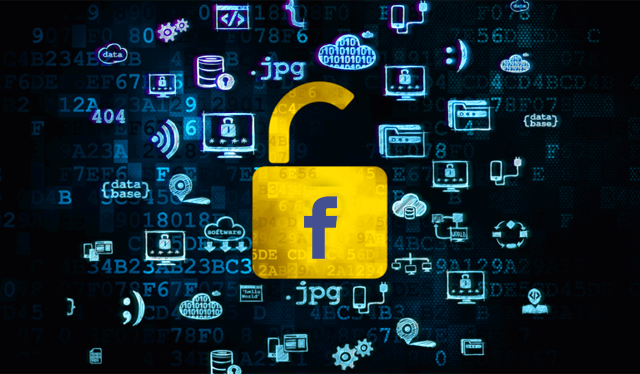

Millions of people use Facebook, and it may be obvious that Facebook tracks your information within the app while you use it. However, many people don't know that Facebook also tracks offline data. This is call off Facebook activity. I know what you're thinking: "How does Facebook gather data if I'm not even using it?" Good question. They get the information through sites and apps that you log into Facebook with, businesses and companies that share thier information with Facebooks uses this information, even from updates within apps that have nothing to do with actions you've taken.

Now that we have a better understanding of off Facebook activity, how does it relate to this report? Well, I want to analyse my own data and make a theoretical hypothesis about how my off Facebook activity is closely related to my everyday habits.

## Hypothesis

What are my everyday habits? Mobile Games. I play mobile games on an extremely frequent, borderline obesessive basis. I do not use Facebook as an app, nor do I log into other sites with my Facebook. However, one thing I used to do was log into Facebook to play games or log in through mobile game applications on my phone. I no longer do this anymore, but I believe that my off Facebook activity will be very closely, if not soley, related to mobile games, causing my ad experience to be tailored towards more game related content. I have not used Facebook in a very long time and it has probably been years since I've seen what a Facebook ad looks like, but I believe my data will provide me with the answers I am looking for without needing to see it myself.

***Fun Fact:*** _I know I wrote a whole introduction about what off Facebook activity is, but I wrote the hypothesis before I knew that Facebook got the information in ways other than simply logging into Facebook from a seperate site or app. Needless to say, I was shook when I saw my data in readable form. So, stay tuned for my feelings towards that, as I also wrote that paragraph before writing the intro as well._

# 1. Overview

### The first step is to import libraries into python that I may use to read the data and load in the data. I did not use all the I imported, but it was nice to have things here for "just in case" purposes.

In [11]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

In [6]:
with open(r'/Users/terra/Downloads/Spring Semester/EMAT/Facebook Data/facebook-100009761133111/ads_and_businesses/your_off-facebook_activity.json') as o:
    off_act = json.load(o)
    
print(off_act.keys())


dict_keys(['off_facebook_activity'])


In [7]:
off_act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

False

# 2. The Data

### Now that I have this giant json data file loaded in, I need a way to iterate thorugh it easier than manually reading each data set one by one. So, for step two I created a for loop to iterate through the data for me. This way, when I convert the information into a panda data frame and go to print each data set, it will already conviently run through each app, ad, event, etc.  


In [9]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in off_act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [10]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,Archero,72,65,3,0,0,1,0
1,Dropdomâ¢ Jewel Block Puzzle,97,25,2,0,0,66,0
2,Water Sort Puzzle,237,0,189,0,0,32,0
3,Idle Light City,7,0,0,0,0,4,0
4,Prison Empire Tycoonï¼Idle Game,11,0,0,0,0,11,0


### Now that the collection of events within each app and site are grouped together, we have to look at the distributions of frequencies per event type. Step 3 is to plot univariate distributions. This allows us to individually see the varying frequencies within each event. This will help later with understanding the proof or disproof of the hypothesis.

### I wanted to see as many of my events as I could before moving on to simplifying the data, just to get a better understanding of what I was working with.

In [12]:
obs = np.array([appbyevent['Activate App'][:4], appbyevent['Custom'][:4]])
obs

array([[ 65,  25,   0,   0],
       [  3,   2, 189,   0]])

In [88]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,Archero,72,65,3,1,0,0
1,Dropdomâ¢ Jewel Block Puzzle,97,25,2,66,0,0
2,Water Sort Puzzle,237,0,189,32,0,0
4,Prison Empire Tycoonï¼Idle Game,11,0,0,11,0,0
5,Power Painter: Shoot & Defense,448,372,0,75,0,0
6,Project Makeover,181,1,180,0,0,0
7,DoorDash - Food Delivery,14,14,0,0,0,0
14,etsy.com,42,0,0,0,18,24
15,Spotify: Music and podcasts,67,42,25,0,0,0
16,Cash App,50,50,0,0,0,0


***Insert paragraph written pre-knowledge of the extent of off Facebook activity. Feelings towards reading my data***

My privacy is feeling a little invaded. I was under the assumtion that off Facebook activity was data that Facebook collected from other apps once you connected them to the app. Upon reading further into the topic, I realized that off Facebook activity is not only activity from apps and websites you’ve logged into with Facebook, but it is also activity from data service providers and marketing agencies, as well as activity that isn't related to any actions you’ve taken. I don't even know what that last one means. I just think it's so weird that Facebook has all this data on events called over 10 times, but I have never even associated any of these sites or apps with facebook. Alot of these are apps that I have on my phone at the moment, and I haven't had Facebook installed for over 3 years now. I know that this information is gather from other companies and not facebook directly, but at what point do these companies decide to no longer allow the invasion of privacy for it's users?


# 3. Data Preparation

### Now that I have seen my data in its entirety, it is time to prepare the data for proving the hypothesis. Instead of working with such a large list of events, I want to focus on apps with higher event counts, as these will have more affect on how Facebook tailors my ads. So, I changed the minimum view count from 11 and made it 56 (10 and 55 are shown in the code, but it only shows event counts that are higher than those numbers, making the minimums 11 and 56). 

### We can also use "chi2_contingency" to test the indepence of variables within the table. Again, this will only help further solidify the findings of proving or disproving the hypothesis.

In [38]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 55]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,Archero,72,65,3,1,0,0
1,Dropdomâ¢ Jewel Block Puzzle,97,25,2,66,0,0
2,Water Sort Puzzle,237,0,189,32,0,0
5,Power Painter: Shoot & Defense,448,372,0,75,0,0
6,Project Makeover,181,1,180,0,0,0
15,Spotify: Music and podcasts,67,42,25,0,0,0
17,Bricks Breaker Quest,439,419,3,7,0,0
18,Affirm: Shop and pay over time,59,13,45,0,0,0
19,Codecademy,62,0,62,0,0,0
37,Truebill Budget & Bill Tracker,58,1,57,0,0,0


In [39]:
sub_obs = np.array(sub_apps.drop(columns = ['App', 'Event Count']))
sub_obs

array([[ 65,   3,   1,   0,   0],
       [ 25,   2,  66,   0,   0],
       [  0, 189,  32,   0,   0],
       [372,   0,  75,   0,   0],
       [  1, 180,   0,   0,   0],
       [ 42,  25,   0,   0,   0],
       [419,   3,   7,   0,   0],
       [ 13,  45,   0,   0,   0],
       [  0,  62,   0,   0,   0],
       [  1,  57,   0,   0,   0],
       [202,   0, 124,   0,   0],
       [ 18, 433,  91,   0,   0],
       [ 46,  16,  10,   0,   0],
       [  0,  61,  25,   0,   0],
       [  0,  78,   0,   0,   0],
       [221,   0,   0,   0,   0],
       [159,   1,   0,   0,   0],
       [  0,   0,   0,  73,   6],
       [120,   0,   0,   0,   0],
       [  0, 106,   0,   0,   0]])

In [40]:
stats.chi2_contingency(sub_obs)

(7064.726368091877,
 0.0,
 76,
 array([[3.38348201e+01, 2.50385612e+01, 8.55798561e+00, 1.44949640e+00,
         1.19136691e-01],
        [4.56034532e+01, 3.37476259e+01, 1.15346763e+01, 1.95366906e+00,
         1.60575540e-01],
        [1.08369496e+02, 8.01959712e+01, 2.74103597e+01, 4.64258993e+00,
         3.81582734e-01],
        [2.19190791e+02, 1.62206331e+02, 5.54408633e+01, 9.39021583e+00,
         7.71798561e-01],
        [8.87551079e+01, 6.56808633e+01, 2.24492086e+01, 3.80230216e+00,
         3.12517986e-01],
        [3.28541007e+01, 2.43128058e+01, 8.30992806e+00, 1.40748201e+00,
         1.15683453e-01],
        [2.10364317e+02, 1.55674532e+02, 5.32083453e+01, 9.01208633e+00,
         7.40719424e-01],
        [2.84408633e+01, 2.10469065e+01, 7.19366906e+00, 1.21841727e+00,
         1.00143885e-01],
        [3.04023022e+01, 2.24984173e+01, 7.68978417e+00, 1.30244604e+00,
         1.07050360e-01],
        [2.84408633e+01, 2.10469065e+01, 7.19366906e+00, 1.21841727e+00,
     

***Fun Fact:*** _I can look at each app individually. This could lead to some other great topics such as: what are my most used apps, what apps influence my facebook ads the most, etc._

In [43]:
sub_apps['App']

0                             Archero
1       Dropdomâ¢ Jewel Block Puzzle
2                   Water Sort Puzzle
5      Power Painter: Shoot & Defense
6                    Project Makeover
15        Spotify: Music and podcasts
17               Bricks Breaker Quest
18     Affirm: Shop and pay over time
19                         Codecademy
37     Truebill Budget & Bill Tracker
54                         Ball Blast
72      Nonogram.com - Griddlers Game
83                        Paper.io 3D
100      letgo: Sell & Buy Used Stuff
105    Smule - The Social Singing App
112     Dropdomâ¢ Puzzle Block Jewel
142                           GroupMe
149                          kent.edu
163      Power Painter: Shoot & Paint
164                         Swagbucks
Name: App, dtype: object

In [41]:
appbyevent.loc[appbyevent['App'] == "Nonogram.com - Griddlers Game"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
72,Nonogram.com - Griddlers Game,556,18,433,0,0,91,0


In [42]:
appbyevent.loc[appbyevent['App'] == "Bricks Breaker Quest"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
17,Bricks Breaker Quest,439,419,3,0,0,7,0


### To further prepare the data for visualization, I will categorize each event within the list. Since my hypothesis is focused specifically on mobile games, I will label the mobile games as games and anything else as an app or site according to what it is. In order to do this, I need to create an array that correlates with the events on the table, then I need to create a new column on the table and assign it to display the array.

In [81]:
types = ['game', 'game', 'game', 'game', 'game', 'app', 'game', 'app', 'site', 'app', 'game', 'game', 'game', 'app', 'app', 'game', 'app', 'site', 'game', 'app']
types

['game',
 'game',
 'game',
 'game',
 'game',
 'app',
 'game',
 'app',
 'site',
 'app',
 'game',
 'game',
 'game',
 'app',
 'app',
 'game',
 'app',
 'site',
 'game',
 'app']

In [82]:
sub_apps['category'] = types
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,category
0,Archero,72,65,3,1,0,0,game
1,Dropdomâ¢ Jewel Block Puzzle,97,25,2,66,0,0,game
2,Water Sort Puzzle,237,0,189,32,0,0,game
5,Power Painter: Shoot & Defense,448,372,0,75,0,0,game
6,Project Makeover,181,1,180,0,0,0,game
15,Spotify: Music and podcasts,67,42,25,0,0,0,app
17,Bricks Breaker Quest,439,419,3,7,0,0,game
18,Affirm: Shop and pay over time,59,13,45,0,0,0,app
19,Codecademy,62,0,62,0,0,0,site
37,Truebill Budget & Bill Tracker,58,1,57,0,0,0,app


# 4. Data Visualization

### Despite Facebook having recieved information on sites and apps that I didn't know about as well as games that I have never logged into Facebook with, my hypothesis holds true that the majority of the information is in relation to mobile games. With 10 apps being categorized as games, 9 as apps, and 1 and a site. For a better look, it can be seen on graphs how many of my event calls is gathered from mobile games.

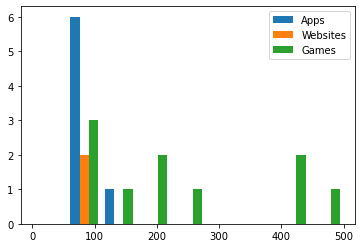

In [66]:
bins = np.linspace(0, 500, 10)
apps = sub_apps['Event Count'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Event Count'].loc[sub_apps['category'] == 'site']
games = sub_apps['Event Count'].loc[sub_apps['category'] == 'game']
plt.hist([apps, sites, games], bins, label = ['Apps', 'Websites', 'Games'])
plt.legend(loc = 'upper right')
plt.show()

### Through this data you can see that while apps have more event calls in a single row, games are more spread across the graph individually. This means that games appears more and that most of my individual events are from mobile games.

### The part of my hypothesis about majority of my information coming from mobile games has been proven, but what about the ads? Are these several individual event calls affecting the way Facebook gives me ads? 

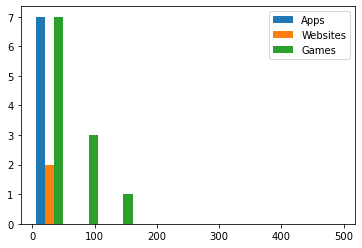

In [86]:
bins = np.linspace(0, 500, 10)
apps = sub_apps['Ad Request'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Ad Request'].loc[sub_apps['category'] == 'site']
games = sub_apps['Ad Request'].loc[sub_apps['category'] == 'game']
plt.hist([apps, sites, games], bins, label = ['Apps', 'Websites', 'Games'])
plt.legend(loc = 'upper right')
plt.show()

### We can see that Apps and Games are tied for Ad request on a single row, but again, games has more seperate individual ad request. Which means there are more individual ads for games being shown to me by Facebook.

# 5. Flaws in the Hypothesis?

### It must be recognized that while my hypothesis does seem to be true, there could still be flaws within the graphs and calculations. Therefore, I must do a T test. This will basically tell me how significant the differences between two groups are. Since "site" only appears once on the category section of my graph, I will only focus on apps and games. 

#### *it is important to note that the results of this data could be slightly off or scewed due to the fact that I am choosing to focus on 19 out of the 20 apps listed on the graph.*

In [72]:
ttest_eventcount = stats.ttest_ind(sub_apps['Event Count'].loc[sub_apps['category'] == 'game'], sub_apps['Event Count'].loc[sub_apps['category'] == 'site'])
ttest_eventcount.statistic

1.4871583792059404

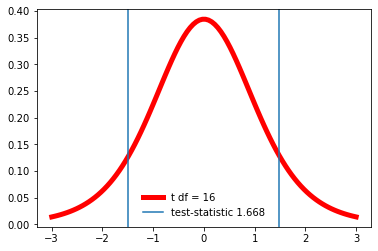

In [73]:
df1 = (len(apps) - 1) + (len(sites) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 100)
ax1.plot(x1, stats.t.pdf(x1, df1), 'r-', lw = 5, label = 't df = 16')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=ttest_eventcount.statistic, label = 'test-statistic 1.668')
ax1.axvline(x=-ttest_eventcount.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [74]:
ttest_eventcount.pvalue

0.1650659018763381

### By running the T test and observing the "pvalue," we can see that with the number of events there is a 16% chance that these two items (apps and games) match perfectly. Which means it is safe to say that Games and Apps are two seperate distributions.

### Comparing this to the "Activate App" portion of my graph, we can see that the p value is really small. Which means that there is a very small chance that these groups are the same. Meaning there is an extremely small chance of any overlapping or incorrect information within the games and data provided.

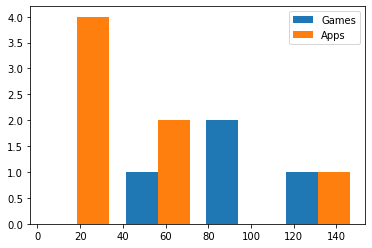

In [80]:
bins = np.linspace(0, 150, 5)
apps = sub_apps['Activate App'].loc[sub_apps['category'] == 'game']
sites = sub_apps['Activate App'].loc[sub_apps['category'] == 'app']
plt.hist([games, apps], bins, label = ['Games', 'Apps'])
plt.legend(loc = 'upper right')
plt.show()

In [77]:
ttest_activateapp = stats.ttest_ind(sub_apps['Activate App'].loc[sub_apps['category'] == 'game'], sub_apps['Activate App'].loc[sub_apps['category'] == 'app'])
ttest_activateapp

Ttest_indResult(statistic=1.7515072221441146, pvalue=0.0990010472518428)

### The chances are even smaller with the Ad Request portion that my hypothesis was based on.

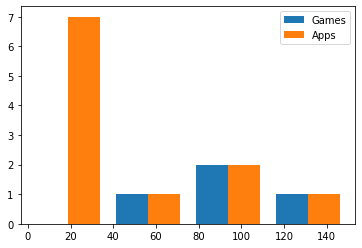

In [85]:
bins = np.linspace(0, 150, 5)
apps = sub_apps['Ad Request'].loc[sub_apps['category'] == 'game']
sites = sub_apps['Ad Request'].loc[sub_apps['category'] == 'app']
plt.hist([games, apps], bins, label = ['Games', 'Apps'])
plt.legend(loc = 'upper right')
plt.show()

In [84]:
ttest_viewcontent = stats.ttest_ind(sub_apps['Ad Request'].loc[sub_apps['category'] == 'game'], sub_apps['View Content'].loc[sub_apps['category'] == 'app'])
ttest_viewcontent

Ttest_indResult(statistic=2.168577473437395, pvalue=0.04553211563298164)

#### *it is also important to note that an argument could be made for apps having more influence as it has the highest number of event calls in a single row and is tied with games in ad request in a single row, despite games being shown more often, but at lesser values.*

# 6. Conclusion

In conclusion, Facebook does mostly collect my off Facebook Activity from mobile games and does appear to be tailoring my ad experience to mobile games as well. Although, it is imparitive that I mention I only gathered this data based off 20 out of 381 apps. This is a huge limitation within the study, as analyzing all of the data would've given me a clearer picture of what Facebook actually collects and does with the data it collects.

My biggest takeaway from this is to be careful with what apps and sites I trust, as I was unaware of how many of these apps and sites were giving my data to Facebook without my knowledge. It seems simple and unimportant to have a gaming company give my data to Facebook, but the matter is not of who gave the data or what the data is about. The issue is simply that I was unaware of it. I thought I had distanced myself from Facebook and yet Facebook somehow still knows every app I have downloaded on my phone despite not even having the Facebook app downloaded. Its scary to think what other information of mine is being given to other companies without my knowledge. I can't say without my consent because I know that apps always make us sign terms of agreements. Do you ever read the terms of agreements before hitting accept? If not, I would challenge you to at least breifly read those before signing up for sites and apps, because you never know what information you could be giving away.

# Thank you for reading

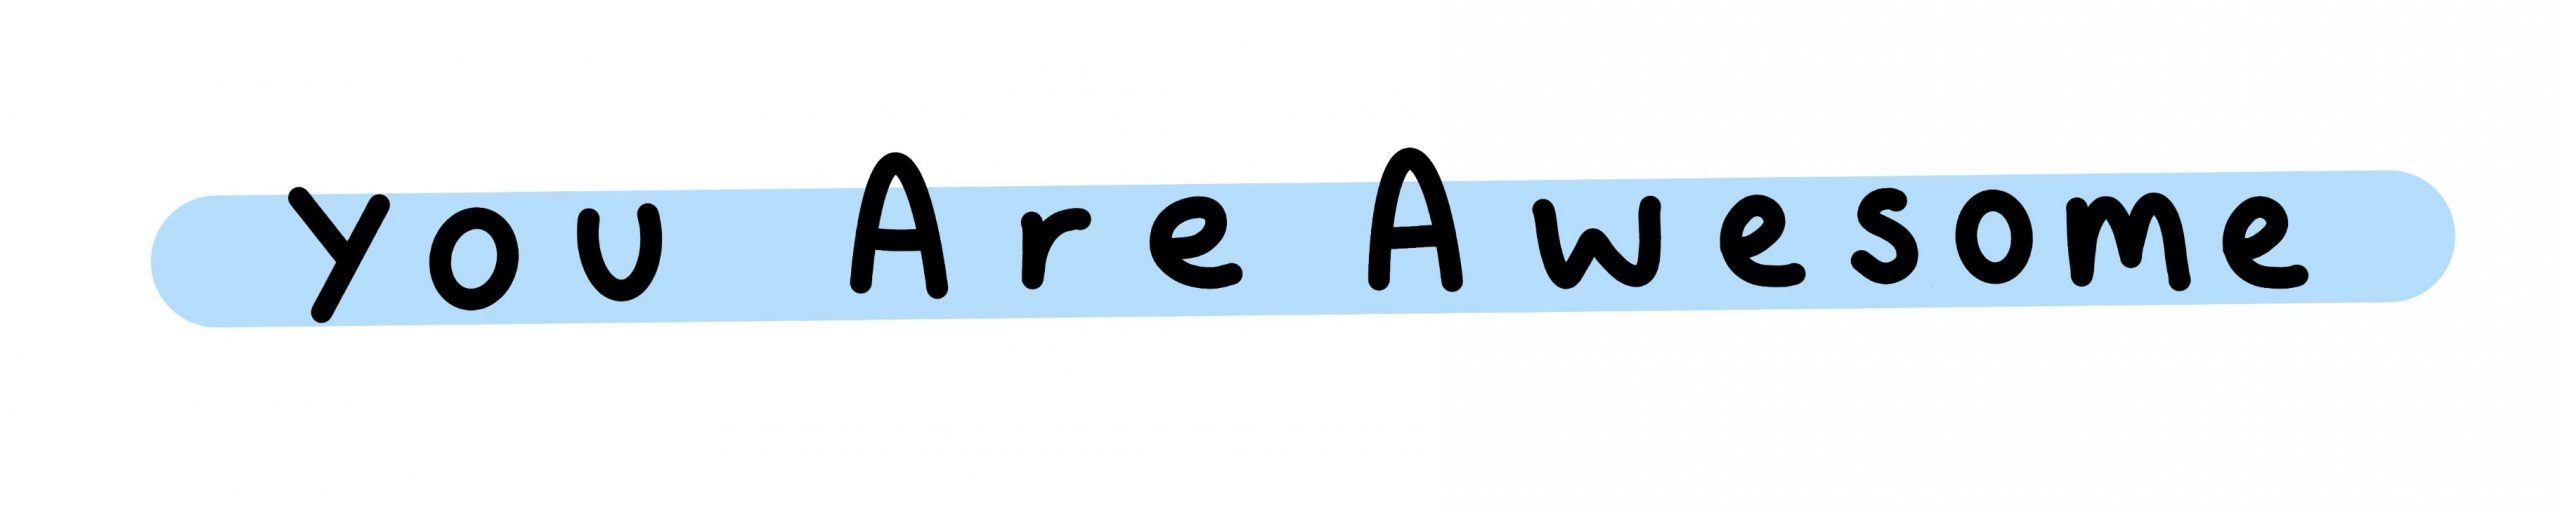